In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df = bank.copy()

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#EDA
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank[['y','housing','default','loan']] = bank[['y','housing','default','loan']].replace({'no':0, 'yes':1})
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [7]:
bank[['y','housing','default','loan']] = bank[['y','housing','default','loan']].astype(int)


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(4), int64(7), object(6)
memory usage: 5.2+ MB


In [9]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [10]:
bank.shape

(45211, 17)

In [11]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
bank1 = pd.concat([bank.iloc[:,0:1],bank.iloc[:,4:8],bank.iloc[:,9:10],bank.iloc[:,11:14],bank.iloc[:,14:15],bank.iloc[:,16:17]],axis=1)
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [13]:
#select features and target
x = bank1.drop('y',axis=1)
y = bank1['y']
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,58,0,2143,1,0,5,261,1,-1,0
1,44,0,29,1,0,5,151,1,-1,0
2,33,0,2,1,1,5,76,1,-1,0
3,47,0,1506,1,0,5,92,1,-1,0
4,33,0,1,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0
45207,71,0,1729,0,0,17,456,2,-1,0
45208,72,0,5715,0,0,17,1127,5,184,3
45209,57,0,668,0,0,17,508,4,-1,0


In [14]:
#train test spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [15]:
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [16]:
X_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
18443,51,0,3029,1,1,31,118,2,-1,0
31473,27,0,0,1,0,1,124,1,-1,0
30988,26,0,1114,0,0,9,44,2,-1,0
12874,32,0,-398,0,1,7,387,2,-1,0
43295,42,0,16517,0,0,15,549,5,203,4
...,...,...,...,...,...,...,...,...,...,...
32800,34,0,520,1,0,17,401,1,248,4
32969,31,0,505,1,0,17,218,4,329,2
41541,67,0,708,0,0,11,96,2,-1,0
43528,31,0,410,0,0,23,342,1,-1,0


In [17]:
X_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
4199,34,0,705,1,1,19,1203,3,-1,0
7504,42,0,163,1,0,29,62,6,-1,0
3023,60,0,751,1,0,14,115,3,-1,0
32377,48,0,113,1,0,16,255,2,318,5
334,45,0,24598,1,0,5,313,3,-1,0
...,...,...,...,...,...,...,...,...,...,...
6305,25,0,776,1,0,27,290,1,-1,0
36258,37,0,20,1,0,11,207,1,370,1
7361,34,0,500,1,0,29,399,1,-1,0
23167,40,0,6,0,0,27,26,16,-1,0


In [18]:
y_train

4199     0
7504     0
3023     0
32377    0
334      0
        ..
6305     0
36258    0
7361     0
23167    0
40796    0
Name: y, Length: 33908, dtype: int32

In [19]:
y_test

18443    0
31473    0
30988    0
12874    0
43295    0
        ..
32800    0
32969    0
41541    0
43528    1
11764    0
Name: y, Length: 11303, dtype: int32

In [20]:
#model creation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
#prediction
y_pred = model.predict(X_test)

In [22]:
pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

,Actual,Prediction
18443,0,0
31473,0,0
30988,0,0
12874,0,0
43295,0,0
...,...,...
32800,0,0
32969,0,0
41541,0,0
43528,1,0


In [23]:
#Accuracy testing (confusion matrix)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9765,  199],
       [1087,  252]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.8862248960452977

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9964
           1       0.56      0.19      0.28      1339

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.61     11303
weighted avg       0.86      0.89      0.86     11303



In [27]:
#roc-auc curve
from sklearn.metrics import roc_curve,roc_auc_score

In [28]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

auc = roc_auc_score(y_test,y_pred)

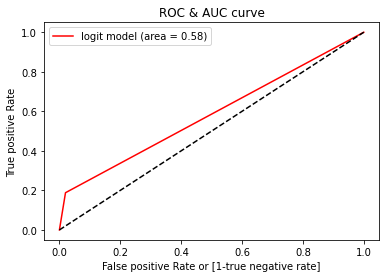

In [29]:
plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC & AUC curve")
plt.xlabel('False positive Rate or [1-true negative rate]')
plt.ylabel('True positive Rate')
plt.legend()
plt.show()

In [45]:
#user testing
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [40]:
def user_testing(data):
    new = pd.DataFrame(data,index=[0])
    result = model.predict(new)[0]
    if result==0:
        print("yes, subscribed a term deposit")
    else:
        print("Accepted!!")

In [46]:
data = {"age":33,"default":0,"balance":2,"housing":1,"loan":1,"day":5,"duration":76,"campaign":1,"pdays":-1,"previous":0}

In [47]:
user_testing(data)

yes, subscribed a term deposit
